<a href="https://colab.research.google.com/github/root-git/churn_prediction/blob/main/Exploratory_Data_Analysis_on_Telecom_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Problem statement

<ul>
<li>Tasked to analyze telecom data to identify potential churn customers</li>
<li>The goal is to predict which users are likely to churn</li>
<li> Below is focusing on EDA.</li>
</ul>

### 2. Import libraries

In [ ]:
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [ ]:
#upload data file from local drive
#uploaded = files.upload()

### 3. Read data

In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded['churn.csv']))

In [ ]:
dataset.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
dataset.columns

Index(['churn', 'accountlength', 'internationalplan', 'voicemailplan',
       'numbervmailmessages', 'totaldayminutes', 'totaldaycalls',
       'totaldaycharge', 'totaleveminutes', 'totalevecalls', 'totalevecharge',
       'totalnightminutes', 'totalnightcalls', 'totalnightcharge',
       'totalintlminutes', 'totalintlcalls', 'totalintlcharge',
       'numbercustomerservicecalls'],
      dtype='object')

### 4. Review basic distribution

In [ ]:
dataset.describe()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### 5. Data quality check

In [ ]:
col_nan = dataset.columns[dataset.isna().any()].tolist()
col_nan

[]

In [ ]:
dataset.isna().any()

churn                         False
accountlength                 False
internationalplan             False
voicemailplan                 False
numbervmailmessages           False
totaldayminutes               False
totaldaycalls                 False
totaldaycharge                False
totaleveminutes               False
totalevecalls                 False
totalevecharge                False
totalnightminutes             False
totalnightcalls               False
totalnightcharge              False
totalintlminutes              False
totalintlcalls                False
totalintlcharge               False
numbercustomerservicecalls    False
dtype: bool

### 6. Variable count histogram

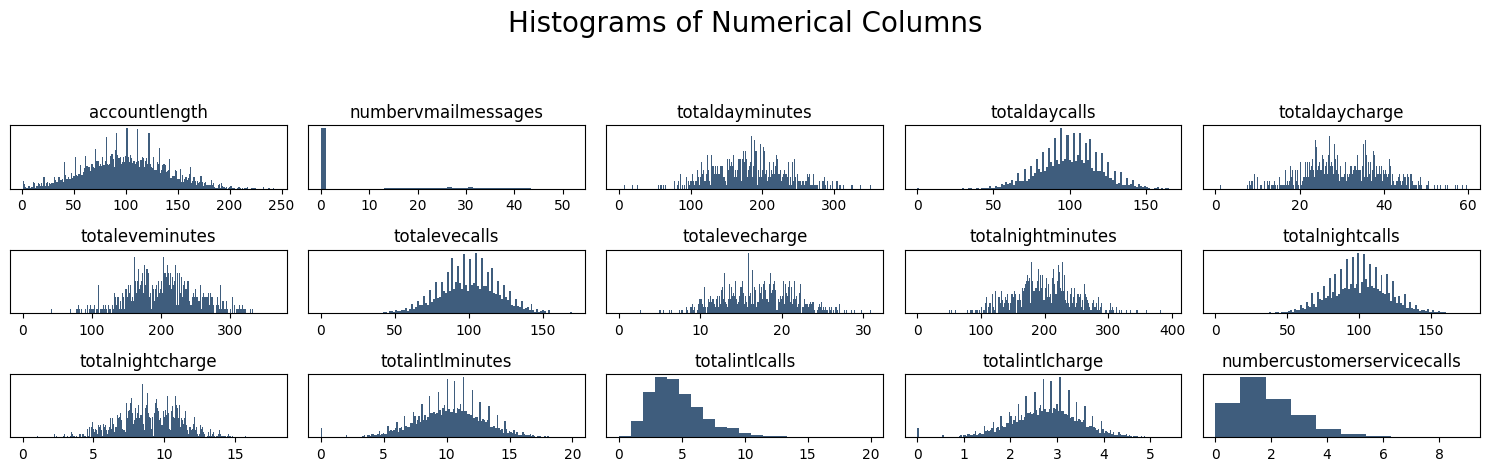

In [ ]:
## Histograms
dataset2 = dataset.drop(columns = ['churn', 'internationalplan', 'voicemailplan'])
fig = plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6,5,i)
    f= plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])

    vals = np.size(dataset2.iloc[:, i-1].unique())

    plt.hist(dataset2.iloc[:, i-1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0,0.3, 1, 0.95])

### 6. Variable pie chart

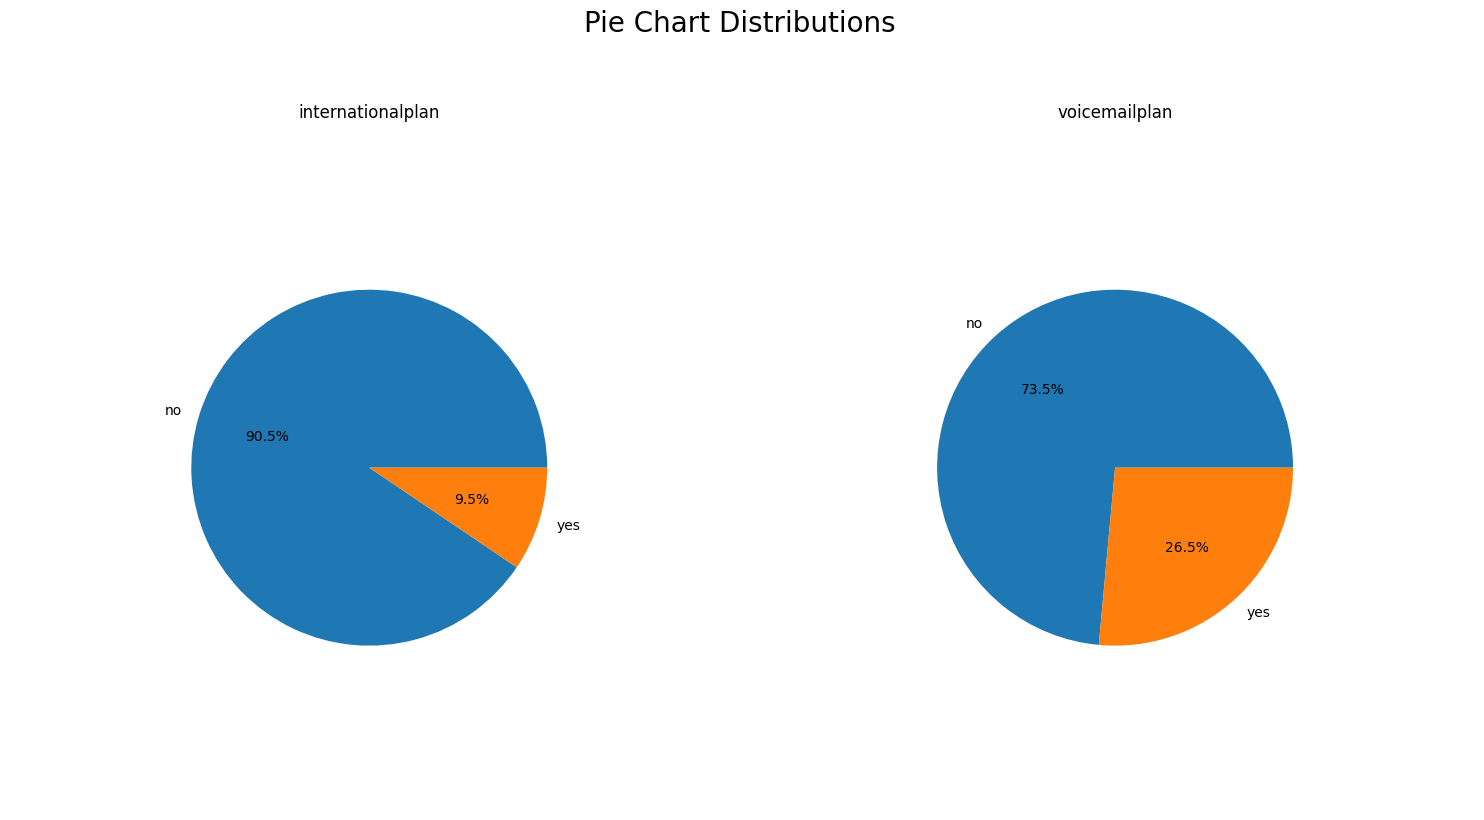

In [ ]:
## Pie Plots
dataset3 = dataset[['internationalplan', 'voicemailplan']]
fig = plt.figure(figsize=(15,12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset3.shape[1]+1):
    plt.subplot(1,2,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset3.columns.values[i-1])

    values = dataset3.iloc[:, i-1].value_counts(normalize = True).values
    index = dataset3.iloc[:, i-1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    #do not show x and y axis
    plt.axis('equal')
fig.tight_layout(rect=[0,0.3,1,0.95])

### 7. Data balance analysis

<ul>
 Imbalanced variable in terms of response variable
<li>internationalplan</li>

</ul>

In [ ]:
## Exploring Uneven Features
dataset[dataset3.internationalplan == 'no'].churn.value_counts()

No     4019
Yes     508
Name: churn, dtype: int64

### 8. Correlation analysis

In [ ]:
dataset2.columns

Index(['accountlength', 'numbervmailmessages', 'totaldayminutes',
       'totaldaycalls', 'totaldaycharge', 'totaleveminutes', 'totalevecalls',
       'totalevecharge', 'totalnightminutes', 'totalnightcalls',
       'totalnightcharge', 'totalintlminutes', 'totalintlcalls',
       'totalintlcharge', 'numbercustomerservicecalls'],
      dtype='object')

In [ ]:
dataset['churn'] = dataset['churn'].map({'Yes':1, 'No':0}) #convert churn to 1 or 0

<Axes: title={'center': 'Correlation with Response Variable'}>

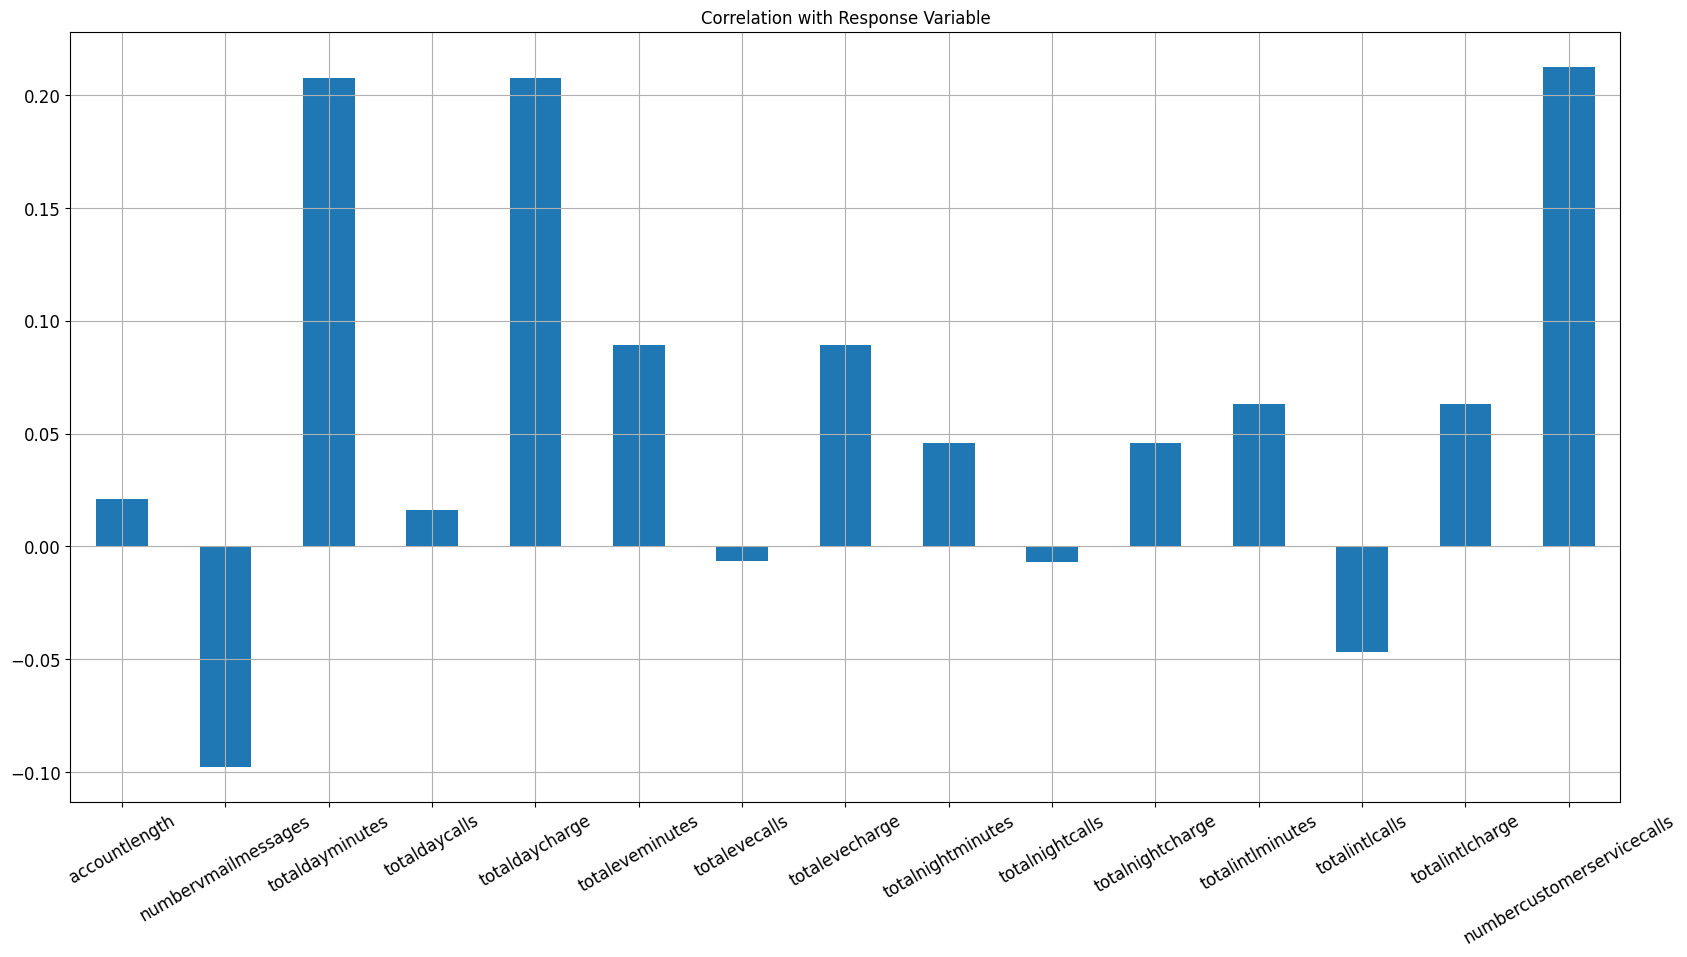

In [ ]:
dataset.drop(columns = ['churn', 'internationalplan', 'voicemailplan']).corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response Variable',
              fontsize = 12, rot = 30, grid = True)

### 8.2 Correlation matrix between independent variable

<ipython-input-19-a84c986f56b7>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.drop(columns = ['churn']).corr()
<ipython-input-19-a84c986f56b7>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

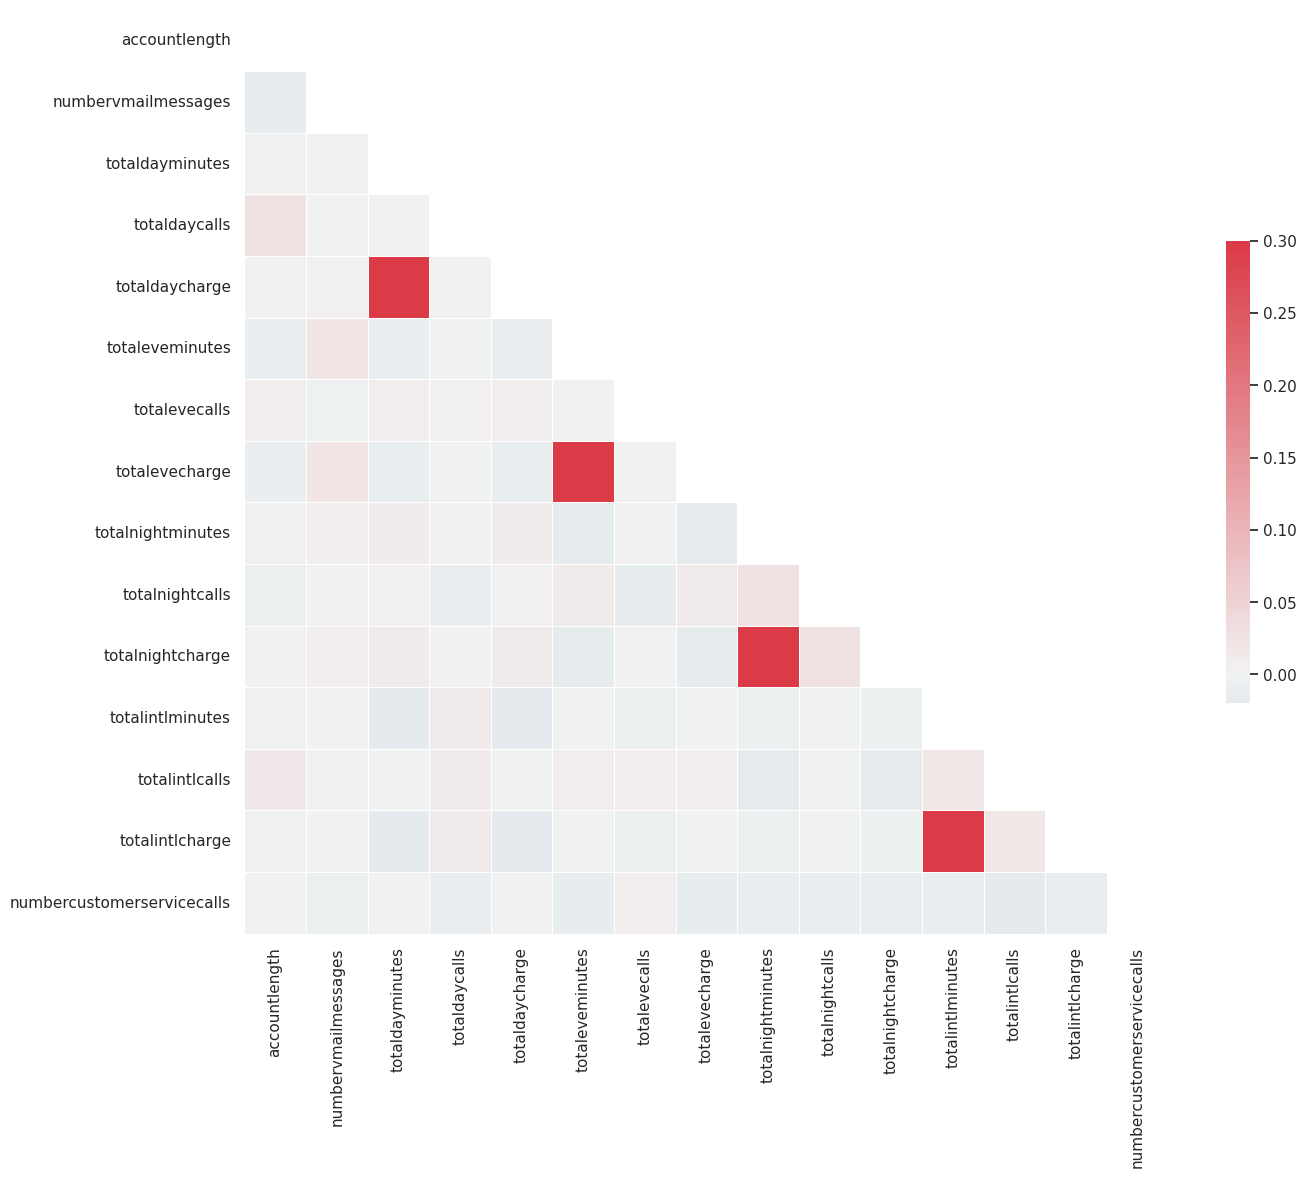

In [ ]:
## Correlation Matrix
sn.set(style='white')

#Compute the correlation matrix
corr = dataset.drop(columns = ['churn']).corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

#Generate a customer diverging colormap

cmap = sn.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})